In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
SIZE = 100

In [3]:
first = np.empty(SIZE+1)
second = np.empty(SIZE+1)
third = np.empty(SIZE+1)
fourth = np.empty(SIZE+1)

sizes = np.arange(0, SIZE+1)

In [4]:
with open(r"\\wsl$\Ubuntu\home\ilya\MADE\mephi_magistracy_1_semestr\multiprocessor_systems\hw01\logger.txt", mode="r") as file:
    while True:
        line = file.readline()
        if not line:
            break
        index = int(re.search("Array size = (.*), result of", line).group(1))
        ticks = int(line.split(" ")[-1])
        if "first" in line:
            first[index] = ticks
        if "second" in line:
            second[index] = ticks
        if "third" in line:
            third[index] = ticks
        if "fourth" in line:
            fourth[index] = ticks

In [5]:
#сглаживание
def moving_average(interval, windowsize):
 
    window = np.ones(int(windowsize)) / float(windowsize)
    new = np.convolve(interval, window, 'same')
    return new

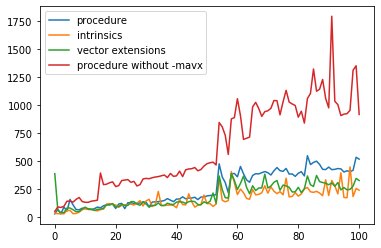

In [6]:
# plot lines with windows
w = 1
plt.plot(sizes, moving_average(first, w), label = "procedure", linestyle="-")
plt.plot(sizes, moving_average(second, w), label = "intrinsics", linestyle="-")
plt.plot(sizes, moving_average(third, w), label = "vector extensions", linestyle="-")
plt.plot(sizes, moving_average(fourth, w), label = "procedure without -mavx", linestyle="-")
plt.legend()
plt.show()